In [1]:
from timeit import default_timer as timer
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = timer()

In [2]:
data = pd.read_csv('applications data.csv')

In [3]:
data.shape

(1000000, 10)

In [4]:
data.head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
5,6,20160101,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0
6,7,20160101,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0
7,8,20160101,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0
8,9,20160101,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0
9,10,20160101,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0


In [5]:
data.dtypes

record          int64
date            int64
ssn             int64
firstname      object
lastname       object
address        object
zip5            int64
dob             int64
homephone       int64
fraud_label     int64
dtype: object

In [6]:
data['appyear'] = (data['date'] / 10000).astype('int')
data['appmonth'] = ((data['date'] - data['appyear'] * 10000) / 100).astype('int')
data['appday'] = data['date'] - data['appyear'] * 10000 - data['appmonth'] * 100
data['date'] = pd.to_datetime(data.appyear*10000+data.appmonth*100+data.appday,format='%Y%m%d')
data = data.drop(columns = ['appyear','appmonth','appday'])

In [7]:
data.dtypes

record                  int64
date           datetime64[ns]
ssn                     int64
firstname              object
lastname               object
address                object
zip5                    int64
dob                     int64
homephone               int64
fraud_label             int64
dtype: object

In [8]:
data.head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2016-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [9]:
data.tail(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
999995,999996,2016-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0
999996,999997,2016-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0
999997,999998,2016-12-31,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0
999998,999999,2016-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0
999999,1000000,2016-12-31,40027083,RXZXSMEZA,UTEAAZXU,112 UTTJT PL,39491,19820826,5869926905,0


In [10]:
data.describe()

,record,ssn,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,500000.500000,5.083415e+08,50073.333143,1.951725e+07,5.368716e+09,0.014393
std,288675.278933,2.934864e+08,28915.921546,3.568872e+05,3.082161e+09,0.119104
min,1.000000,3.600000e+01,2.000000,1.900010e+07,5.937990e+05,0.000000
25%,250000.750000,2.542176e+08,24992.000000,1.916092e+07,2.677134e+09,0.000000
50%,500000.500000,5.088144e+08,50492.000000,1.950090e+07,5.399910e+09,0.000000
75%,750000.250000,7.630924e+08,74496.000000,1.983032e+07,8.109241e+09,0.000000
max,1000000.000000,1.000000e+09,99999.000000,2.016103e+07,1.000000e+10,1.000000


In [11]:
data.count()

record         1000000
date           1000000
ssn            1000000
firstname      1000000
lastname       1000000
address        1000000
zip5           1000000
dob            1000000
homephone      1000000
fraud_label    1000000
dtype: int64

In [12]:
data['fraud_label'].sum()

14393

In [13]:
print(len(data[data['fraud_label'] == 0]))

985607


In [14]:
print(len(data[data['fraud_label'] == 0]) + len(data[data['fraud_label'] != 0]))

1000000


In [15]:
goods = data[data['fraud_label'] == 0]
bads = data[data['fraud_label'] == 1]

In [16]:
numrecords = len(data)
print(numrecords)

1000000


In [17]:
print(len(goods))

985607


In [18]:
print(len(bads))

14393


In [19]:
len(data['record'].unique())

1000000

In [20]:
len(data['record']) * 100 / numrecords

100.0

In [21]:
len(data['date']) * 100 / numrecords

100.0

In [22]:
len(data['date'].unique())

365

In [23]:
count_day = data.groupby('date').count()
count_day.head(10)

,record,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
date,,,,,,,,,
2016-01-01,2840,2840,2840,2840,2840,2840,2840,2840,2840
2016-01-02,2719,2719,2719,2719,2719,2719,2719,2719,2719
2016-01-03,2764,2764,2764,2764,2764,2764,2764,2764,2764
2016-01-04,2757,2757,2757,2757,2757,2757,2757,2757,2757
2016-01-05,2732,2732,2732,2732,2732,2732,2732,2732,2732
2016-01-06,2682,2682,2682,2682,2682,2682,2682,2682,2682
2016-01-07,2782,2782,2782,2782,2782,2782,2782,2782,2782
2016-01-08,2809,2809,2809,2809,2809,2809,2809,2809,2809
2016-01-09,2779,2779,2779,2779,2779,2779,2779,2779,2779


<AxesSubplot:title={'center':'Daily Applications'}, xlabel='date'>

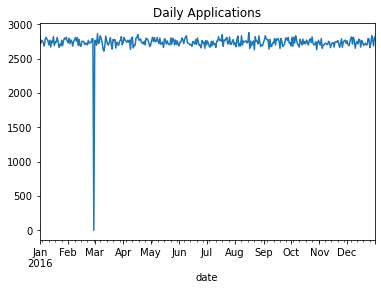

In [24]:
daily_count = data.assign(apps = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 1))\
    .count().apps
daily_count.plot(title = 'Daily Applications')

<AxesSubplot:title={'center':'Daily Applications'}, xlabel='date'>

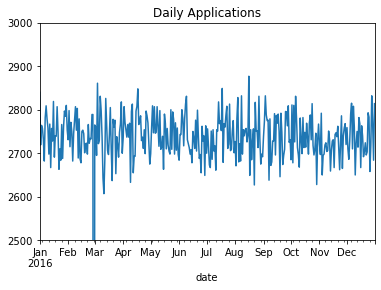

In [25]:
daily_count = data.assign(apps = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 1))\
    .count().apps
plt.ylim(2500,3000)
daily_count.plot(title = 'Daily Applications')

In [26]:
daily_count.head(70)

date
2016-01-01    2840
2016-01-02    2719
2016-01-03    2764
2016-01-04    2757
2016-01-05    2732
              ... 
2016-03-06    2730
2016-03-07    2831
2016-03-08    2798
2016-03-09    2738
2016-03-10    2643
Freq: D, Name: apps, Length: 70, dtype: int64

In [27]:
daily_count['2016-02-29'] = daily_count['2016-02-28']
daily_count.head(70)

date
2016-01-01    2840
2016-01-02    2719
2016-01-03    2764
2016-01-04    2757
2016-01-05    2732
              ... 
2016-03-06    2730
2016-03-07    2831
2016-03-08    2798
2016-03-09    2738
2016-03-10    2643
Freq: D, Name: apps, Length: 70, dtype: int64

<AxesSubplot:title={'center':'Daily Applications'}, xlabel='date'>

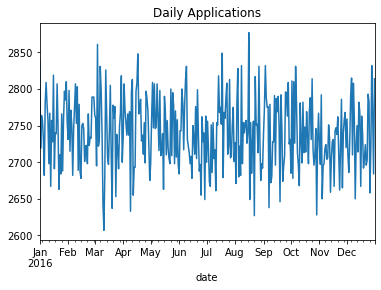

In [28]:
daily_count.plot(title = 'Daily Applications')

<AxesSubplot:title={'center':'Daily Applicationss'}, xlabel='date'>

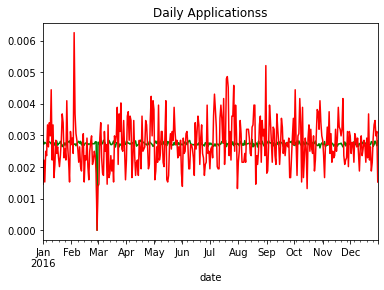

In [29]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(apps = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 1)).count().apps
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Applicationss', color = 'green')
bads_series = bads.assign(apps = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 1)).count().apps
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

<AxesSubplot:title={'center':'Weekly Applications'}, xlabel='date'>

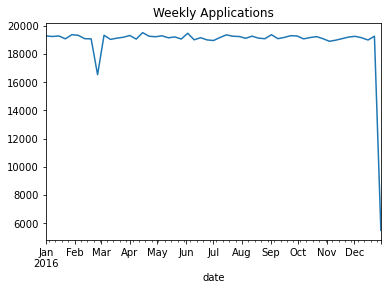

In [30]:
weekly_applications = data.assign(apps = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 7))\
    .count().apps
weekly_applications.plot(title = 'Weekly Applications')

In [31]:
weekly_applications.head(60)

date
2016-01-01    19276
2016-01-08    19235
2016-01-15    19272
2016-01-22    19068
2016-01-29    19363
2016-02-05    19318
2016-02-12    19081
2016-02-19    19067
2016-02-26    16531
2016-03-04    19323
2016-03-11    19029
2016-03-18    19118
2016-03-25    19181
2016-04-01    19306
2016-04-08    19052
2016-04-15    19508
2016-04-22    19254
2016-04-29    19217
2016-05-06    19284
2016-05-13    19143
2016-05-20    19204
2016-05-27    19057
2016-06-03    19463
2016-06-10    19000
2016-06-17    19151
2016-06-24    18994
2016-07-01    18950
2016-07-08    19160
2016-07-15    19351
2016-07-22    19255
2016-07-29    19233
2016-08-05    19108
2016-08-12    19258
2016-08-19    19116
2016-08-26    19080
2016-09-02    19362
2016-09-09    19082
2016-09-16    19169
2016-09-23    19292
2016-09-30    19272
2016-10-07    19067
2016-10-14    19160
2016-10-21    19227
2016-10-28    19080
2016-11-04    18896
2016-11-11    18975
2016-11-18    19084
2016-11-25    19196
2016-12-02    19247
2016-12-09    1

<AxesSubplot:title={'center':'Weekly Applications'}, xlabel='date'>

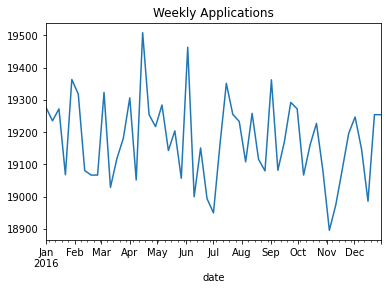

In [32]:
weekly_applications['2016-02-26'] = weekly_applications['2016-02-19']
weekly_applications['2016-12-30'] = weekly_applications['2016-12-23']
weekly_applications.plot(title = 'Weekly Applications')

<AxesSubplot:title={'center':'Weeky Applications'}, xlabel='date'>

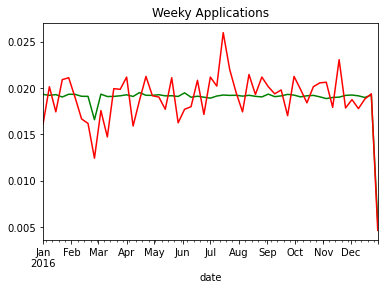

In [33]:
goods_series = goods.assign(apps = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 7)).count().apps
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weeky Applications', color = 'green')
bads_series = bads.assign(apps = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 7)).count().apps
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

In [34]:
len(data['ssn']) * 100 / numrecords

100.0

In [35]:
len(data['ssn'].unique())

835819

In [36]:
data['ssn'].value_counts()

999999999    16935
938972725      114
810776805       81
829352390       74
473311863       44
             ...  
705106256        1
457646422        1
419899735        1
500860762        1
803217404        1
Name: ssn, Length: 835819, dtype: int64

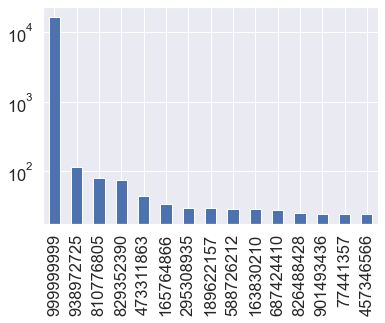

In [37]:
sns.set(font_scale=1.5)
data['ssn'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')

In [38]:
data[data['ssn'] == 999999999].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
10,11,2016-01-01,999999999,UZZSMXSEE,USJZUSA,726 UMTXU ST,92129,19400126,3026547212,0
22,23,2016-01-01,999999999,ETXMUSZEM,UJMAMEU,3387 STRUM WY,45982,19580830,5568704443,0
64,65,2016-01-01,999999999,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,19070626,9999999999,0
68,69,2016-01-01,999999999,UUZAJXZMT,SRAAMZXU,2557 URRXS DR,98407,20110831,5490098836,0
74,75,2016-01-01,999999999,AUATMMZX,UUUTAZR,30 ETXRM ST,38402,19760625,2382673773,0
283,284,2016-01-01,999999999,MSJUZSMZJ,UXMTEZUT,356 UZSRE AVE,74187,19070626,153492955,0
380,381,2016-01-01,999999999,XRJSMRRRT,RMRXAMX,9769 UAMZJ DR,52351,19070626,3181686949,0
420,421,2016-01-01,999999999,XRXMTMZEZ,SZRXXJMX,5854 RXRXX PL,34957,19970721,316681200,0
446,447,2016-01-01,999999999,RRZUZUSX,ESZRRRAA,8970 AXME RD,48333,19110729,5350782211,0
468,469,2016-01-01,999999999,XETRJXESR,SSJXTUJM,6995 RMSST CT,48162,19700418,2503172355,0


In [39]:
len(data['firstname']) * 100 / numrecords

100.0

In [40]:
len(data['firstname'].unique())

78136

In [41]:
data['firstname'].value_counts()

EAMSTRMT     12658
TXEMXZZM     10297
UXXJJZTUZ    10235
UJSRSMUEZ     9994
SREZUJMJU     9688
             ...  
EARARMERA        1
SERXZAREJ        1
RASATJEJR        1
RXUAEEXZM        1
ZTUSXAJU         1
Name: firstname, Length: 78136, dtype: int64

<AxesSubplot:>

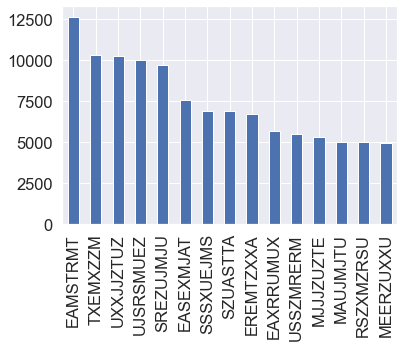

In [42]:
data['firstname'].value_counts().head(15).plot(kind='bar')

In [43]:
len(data['lastname']) * 100 / numrecords

100.0

In [44]:
len(data['lastname'].unique())

177001

In [45]:
data['lastname'].value_counts()

ERJSAXA     8580
UMXUUUSE    7156
UMARRMA     6832
MEAXJUX     5492
XMERRR      5451
            ... 
URESXJZA       1
RZRMMZXM       1
UZJUTSX        1
RJAUAXXA       1
SAZMJSMR       1
Name: lastname, Length: 177001, dtype: int64

<AxesSubplot:>

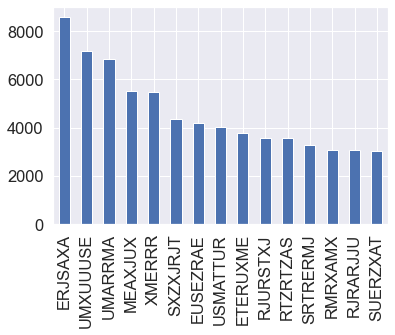

In [46]:
data['lastname'].value_counts().head(15).plot(kind='bar')

In [47]:
len(data['address']) * 100 / numrecords

100.0

In [48]:
len(data['address'].unique())

828774

In [49]:
data['address'].value_counts()

123 MAIN ST       1079
1775 XJXE LN        97
7433 RAEZA ST       80
8911 MZSU DR        74
4907 RRAAU DR       73
                  ... 
6747 REXA PL         1
9714 XAZXT AVE       1
5445 EMRAA ST        1
1015 SSZUZ PL        1
2942 UUMXZ ST        1
Name: address, Length: 828774, dtype: int64

<AxesSubplot:>

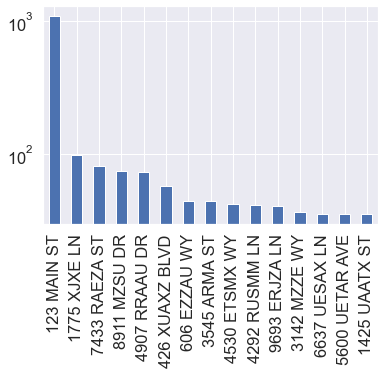

In [50]:
data['address'].value_counts().head(15).plot(kind='bar',logy=True)

In [51]:
data[data['address'] == '123 MAIN ST'].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
1247,1248,2016-01-01,904524264,UJSRSMUEZ,EAXAXAXA,123 MAIN ST,68138,19241031,8135264540,0
2191,2192,2016-01-01,345413970,XXSMUSEJT,SRRAXESJ,123 MAIN ST,68138,19300526,94097353,0
2529,2530,2016-01-01,821839005,UXZUMTRTR,EARTMRJS,123 MAIN ST,68138,19621101,7715547340,0
3434,3435,2016-01-02,24205988,SXTUZZXAS,UJJAJMM,123 MAIN ST,68138,19640428,8788942828,0
3750,3751,2016-01-02,623763056,SEZESJMSR,UZJEUZMT,123 MAIN ST,68138,19731107,974228226,0
4715,4716,2016-01-02,686787130,SXXSZJMM,ARRZTAA,123 MAIN ST,68138,19810323,1839236819,1
5353,5354,2016-01-02,932938215,UXRJESTM,EETAEAR,123 MAIN ST,68138,19980513,5441682419,0
7299,7300,2016-01-03,417080344,SJETUJAAZ,REMJTREU,123 MAIN ST,92821,19340914,7507186577,0
8512,8513,2016-01-04,477797652,EAMSTRMT,UTXXZZET,123 MAIN ST,68138,19190519,5922864904,0
8750,8751,2016-01-04,6367698,XUERJXSTU,EERMEXAE,123 MAIN ST,42035,19821127,6442565981,0


In [52]:
len(data['zip5']) * 100 / numrecords

100.0

In [53]:
len(data['zip5'].unique())

26370

In [54]:
data['zip5'].value_counts()

68138    823
90042    514
89835    489
35227    478
14931    459
        ... 
19358      1
54992      1
52110      1
33877      1
90739      1
Name: zip5, Length: 26370, dtype: int64

<AxesSubplot:>

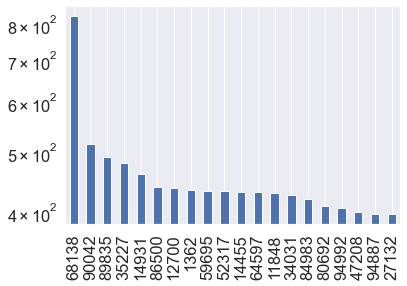

In [55]:
data['zip5'].value_counts().head(20).plot(kind='bar',logy=True)

In [56]:
len(data['dob']) * 100 / numrecords

100.0

In [57]:
len(data['dob'].unique())

42673

In [58]:
data['dob'].value_counts()

19070626    126568
19640318      4818
19760625      3723
19880628      1404
19740216       980
             ...  
19330705         5
19750509         5
19450523         5
19860313         5
19960904         5
Name: dob, Length: 42673, dtype: int64

<AxesSubplot:>

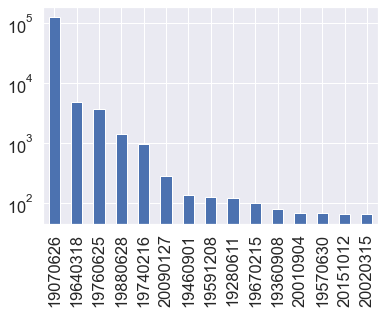

In [59]:
data['dob'].value_counts().head(15).plot(kind='bar',logy=True)

In [60]:
len(data['homephone']) * 100 / numrecords

100.0

In [61]:
len(data['homephone'].unique())

28244

In [62]:
data['homephone'].value_counts()

9999999999    78512
6384782007      466
6035129044      360
2113738531      331
4024680535      198
              ...  
1085332700        1
8331016607        1
8200004633        1
7517846394        1
2897617843        1
Name: homephone, Length: 28244, dtype: int64

<AxesSubplot:>

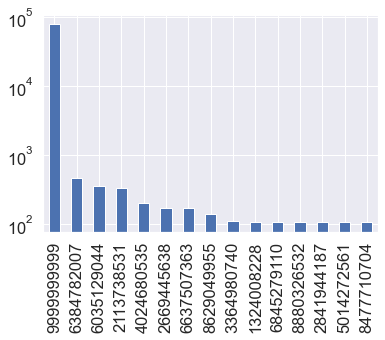

In [63]:
data['homephone'].value_counts().head(15).plot(kind='bar',logy=True)

In [64]:
data[data['homephone'] == 9999999999].head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
17,18,2016-01-01,346374636,XRSSZZUXT,ETXZXJAJ,5719 UEZJT PL,51486,19500110,9999999999,0
26,27,2016-01-01,735495403,EMSSTSXUA,STZRUXZM,9323 STRMS PL,51395,19881111,9999999999,0
60,61,2016-01-01,780136117,UZTZEETU,ARUZTZM,5317 UTXME ST,37840,19731129,9999999999,0
64,65,2016-01-01,999999999,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,19070626,9999999999,0
145,146,2016-01-01,671506143,TXEMXZZM,SRTERSRA,5795 UMUTM BLVD,45077,19030913,9999999999,0
149,150,2016-01-01,149112205,EZTERXZRA,EERMAXJU,2249 XXAU DR,27375,19841206,9999999999,0
178,179,2016-01-01,507916615,EUEJUURAR,XUSMXRU,8314 XXMX DR,398,19720416,9999999999,0
179,180,2016-01-01,106080337,SRARXRMRM,UTJMRJUX,8413 URUEU WY,15746,19070626,9999999999,0
180,181,2016-01-01,291680381,MUSXJTSSX,EXAAJUT,9762 SXJXM LN,41694,19620504,9999999999,0
200,201,2016-01-01,13382014,EAMSTRMT,RURSXSXX,372 SXTEA DR,42716,19070626,9999999999,0


In [65]:
print(f'Duration: {(timer() - start_time) / 60: 0.2f} minutes, or{(timer() - start_time): 0.0f} seconds')

Duration:  0.15 minutes, or 9 seconds


In [66]:
data

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2016-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
...,...,...,...,...,...,...,...,...,...,...
999995,999996,2016-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0
999996,999997,2016-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0
999997,999998,2016-12-31,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0
999998,999999,2016-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0


In [67]:
data.dtypes

record                  int64
date           datetime64[ns]
ssn                     int64
firstname              object
lastname               object
address                object
zip5                    int64
dob                     int64
homephone               int64
fraud_label             int64
dtype: object

In [68]:
import datetime as dt
from datetime import datetime

In [69]:
#data['date'] = pd.to_datetime(data.date.astype(str).apply (lambda x:x[:4]+ '-' + x[4:6] +'-' + x[6:]))
data['zip5'] = data['zip5'].apply(lambda x: '{0:0>5}'.format(x))
data

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,02765,19070626,1797504115,0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2016-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,03173,19980315,6101082272,0
...,...,...,...,...,...,...,...,...,...,...
999995,999996,2016-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0
999996,999997,2016-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0
999997,999998,2016-12-31,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0
999998,999999,2016-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0


In [70]:
data.loc[data.ssn == 999999999, 'ssn'] = -data[data.ssn == 999999999]['record']
data['ssn'] = data['ssn'].apply(lambda x: '{0:0>9}'.format(x))
data

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,02765,19070626,1797504115,0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2016-01-01,024065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,03173,19980315,6101082272,0
...,...,...,...,...,...,...,...,...,...,...
999995,999996,2016-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0
999996,999997,2016-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0
999997,999998,2016-12-31,025283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0
999998,999999,2016-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0


In [71]:
data['address'] = np.where(data['address'] == "123 MAIN ST", -data['record'], data['address'])
data['address'] = data['address'].astype(str)

In [72]:
data.head(100)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,02765,19070626,1797504115,0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2016-01-01,024065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,03173,19980315,6101082272,0
...,...,...,...,...,...,...,...,...,...,...
95,96,2016-01-01,939863686,UUZMJST,RJURSTXJ,7277 XEART CT,69109,19921029,7393643883,0
96,97,2016-01-01,960805076,XRTAEZASZ,SUERZXAT,8411 URMMX RD,20001,19950822,1458629808,0
97,98,2016-01-01,695355308,ZMEAJXJU,AXRTEJE,5743 RTRTX ST,25254,19200526,5421614404,0
98,99,2016-01-01,870939019,ETREZZUXS,EAZSEEJE,200 UUUJM AVE,05507,19770415,9419642060,0


In [73]:
data.loc[data.dob == 19070626, 'dob'] = -data.loc[data.dob == 19070626]['record']
data['dob'] = data['dob'].apply(lambda x:'{0:0>8}'.format(x))
data

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,02765,000000-1,1797504115,0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,000000-3,216537580,0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2016-01-01,024065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,03173,19980315,6101082272,0
...,...,...,...,...,...,...,...,...,...,...
999995,999996,2016-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0
999996,999997,2016-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0
999997,999998,2016-12-31,025283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0
999998,999999,2016-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0


In [74]:
data.loc[data.homephone == 9999999999, 'homephone'] = data.loc[data.homephone == 9999999999]['record']
data['homephone'] = data['homephone'].apply(lambda x: '{0:0>10}'.format(x))
data

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,02765,000000-1,1797504115,0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,000000-3,0216537580,0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,0132144161,0
4,5,2016-01-01,024065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,03173,19980315,6101082272,0
...,...,...,...,...,...,...,...,...,...,...
999995,999996,2016-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0
999996,999997,2016-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0
999997,999998,2016-12-31,025283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0
999998,999999,2016-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   record       1000000 non-null  int64         
 1   date         1000000 non-null  datetime64[ns]
 2   ssn          1000000 non-null  object        
 3   firstname    1000000 non-null  object        
 4   lastname     1000000 non-null  object        
 5   address      1000000 non-null  object        
 6   zip5         1000000 non-null  object        
 7   dob          1000000 non-null  object        
 8   homephone    1000000 non-null  object        
 9   fraud_label  1000000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 76.3+ MB


In [76]:
import calendar
data['dow'] = data.date.apply(lambda x: calendar.day_name[x.weekday()])

In [77]:
train_test = data[data.date < '2016-11-01']

In [78]:
c = 4; nmid = 20; y_avg = train_test['fraud_label'].mean()
y_dow = train_test.groupby('dow')['fraud_label'].mean()
num = train_test.groupby('dow').size()
y_dow_smooth = y_avg + (y_dow - y_avg)/(1 + np.exp(-(num-nmid)/c))
data['dow_risk'] = data.dow.map(y_dow_smooth)

In [79]:
y_dow = y_dow.reset_index()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y_dow['dow'] = pd.Categorical(y_dow['dow'], categories = cats, ordered = True)
y_dow = y_dow.sort_values('dow')
y_dow = y_dow.set_index('dow')

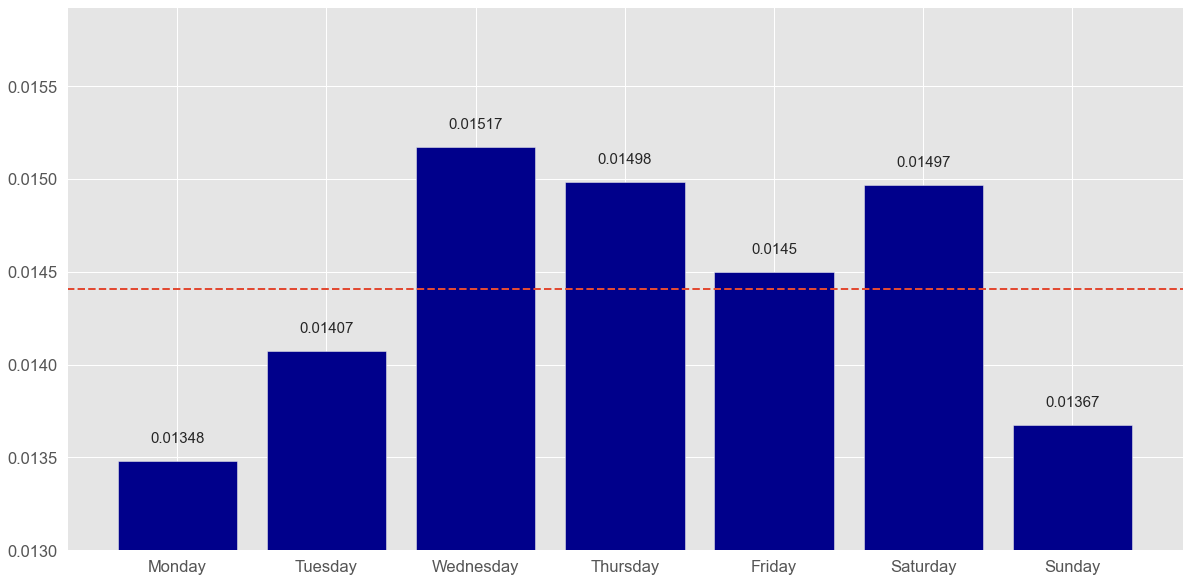

In [80]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(data = y_dow, x=y_dow.index, height = 'fraud_label', color = 'darkblue')
ax.set_ylim(bottom = 0.013)
ax.axhline(y = y_avg, ls = '--', lw = 2)

for i, v in enumerate(y_dow.index):
    ax.text(v, y_dow.loc[i, 'fraud_label'] + 0.0001, round(y_dow.loc[i, 'fraud_label'], 5), horizontalalignment = 'center', fontsize = 15)

plt.show()

In [81]:
data

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dow,dow_risk
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,02765,000000-1,1797504115,0,Friday,0.014499
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,Friday,0.014499
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,000000-3,0216537580,0,Friday,0.014499
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,0132144161,0,Friday,0.014499
4,5,2016-01-01,024065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,03173,19980315,6101082272,0,Friday,0.014499
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,2016-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0,Saturday,0.014968
999996,999997,2016-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0,Saturday,0.014968
999997,999998,2016-12-31,025283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0,Saturday,0.014968
999998,999999,2016-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0,Saturday,0.014968


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   record       1000000 non-null  int64         
 1   date         1000000 non-null  datetime64[ns]
 2   ssn          1000000 non-null  object        
 3   firstname    1000000 non-null  object        
 4   lastname     1000000 non-null  object        
 5   address      1000000 non-null  object        
 6   zip5         1000000 non-null  object        
 7   dob          1000000 non-null  object        
 8   homephone    1000000 non-null  object        
 9   fraud_label  1000000 non-null  int64         
 10  dow          1000000 non-null  object        
 11  dow_risk     1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 91.6+ MB


In [84]:
data['name'] = data.firstname + data.lastname
data['fulladdress'] = data.address + data.zip5
data['name_dob'] = data.name + data.dob
data['name_fulladdress'] = data.name + data.fulladdress
data['name_homephone'] = data.name + data.homephone
data['fulladdress_dob'] = data.fulladdress + data.dob
data['fulladdress_homephone'] = data.fulladdress + data.homephone
data['dob_homephone'] = data.dob + data.homephone
data['homephone_name_dob'] = data.homephone + data.name_dob
data['fulladdress_name_dob'] = data.fulladdress + data.name_dob

In [85]:
data['name_zip5'] = data.name + data.zip5
data['name_address'] = data.name + data.address

data['firstname_dob'] = data.firstname + data.dob
data['firstname_address'] = data.firstname + data.address
data['firstname_zip5'] = data.firstname + data.zip5
data['firstname_homephone'] = data.firstname + data.homephone
data['firstname_fulladdress'] = data.firstname + data.fulladdress

data['lastname_dob'] = data.lastname + data.dob
data['lastname_address'] = data.lastname + data.address
data['lastname_zip5'] = data.lastname + data.zip5
data['lastname_homephone'] = data.lastname + data.homephone
data['lastname_fulladdress'] = data.lastname + data.fulladdress

In [86]:
for field in list(data.iloc[:,np.r_[3:9, 12:22]].columns):
    data['ssn_' + field] = data.ssn + data[field]

In [87]:
#for field in list(data.iloc[:,np.r_[15:]].columns):
#    data['ssn_' + field] = data.ssn + data[field]

In [88]:
(data.columns)

Index(['record', 'date', 'ssn', 'firstname', 'lastname', 'address', 'zip5',
       'dob', 'homephone', 'fraud_label', 'dow', 'dow_risk', 'name',
       'fulladdress', 'name_dob', 'name_fulladdress', 'name_homephone',
       'fulladdress_dob', 'fulladdress_homephone', 'dob_homephone',
       'homephone_name_dob', 'fulladdress_name_dob', 'name_zip5',
       'name_address', 'firstname_dob', 'firstname_address', 'firstname_zip5',
       'firstname_homephone', 'firstname_fulladdress', 'lastname_dob',
       'lastname_address', 'lastname_zip5', 'lastname_homephone',
       'lastname_fulladdress', 'ssn_firstname', 'ssn_lastname', 'ssn_address',
       'ssn_zip5', 'ssn_dob', 'ssn_homephone', 'ssn_name', 'ssn_fulladdress',
       'ssn_name_dob', 'ssn_name_fulladdress', 'ssn_name_homephone',
       'ssn_fulladdress_dob', 'ssn_fulladdress_homephone', 'ssn_dob_homephone',
       'ssn_homephone_name_dob', 'ssn_fulladdress_name_dob'],
      dtype='object')

In [89]:
attributes = list(data.iloc[:, np.r_[2, 5, 7, 8, 12:50]].columns)

In [90]:
len(attributes)

42

In [91]:
data1 = data.copy()
vars = data.copy()
data1['check_date'] = data1.date
data1['check_record'] = data1.record
vars.shape

(1000000, 50)

In [92]:
import time
begin = time.time()
for entity in attributes:
    st = time.time()
    data_1 = data1[['record', 'date', entity]]
    data_r = data1[['check_record', 'check_date', entity]]
    temp = pd.merge(data_1, data_r, left_on = entity, right_on = entity)
    
    day_since_data = temp[temp.record > temp.check_record][['record', 'date', 'check_date']].groupby('record')[['date', 'check_date']].last()
    mapper = (day_since_data.date - day_since_data.check_date).dt.days
    vars[entity + '_day_since'] = vars.record.map(mapper)
    vars[entity + '_day_since'].fillna(365, inplace = True)
    print(f'\n{entity}_day_since ---> Done')
    
    for offset_t in [0, 1, 3, 7, 14, 30]:
        count_day_data = temp[(temp.check_date >= (temp.date - dt.timedelta(offset_t))) & (temp.record >= temp.check_record)]
        col_name = f'{entity}_count_{offset_t}'
        mapper2 = count_day_data.groupby('record')[entity].count()
        vars[col_name] = vars.record.map(mapper2)
        
        print(f'{entity}_count_{str(offset_t)} ---> Done')
    
    print(f'Run time for entity {entity} -------- {time.time()-st}s')
    
print(f'Total run time: {(time.time() - begin)/60}min')
     


ssn_day_since ---> Done
ssn_count_0 ---> Done
ssn_count_1 ---> Done
ssn_count_3 ---> Done
ssn_count_7 ---> Done
ssn_count_14 ---> Done
ssn_count_30 ---> Done
Run time for entity ssn -------- 2.5279006958007812s

address_day_since ---> Done
address_count_0 ---> Done
address_count_1 ---> Done
address_count_3 ---> Done
address_count_7 ---> Done
address_count_14 ---> Done
address_count_30 ---> Done
Run time for entity address -------- 2.5677833557128906s

dob_day_since ---> Done
dob_count_0 ---> Done
dob_count_1 ---> Done
dob_count_3 ---> Done
dob_count_7 ---> Done
dob_count_14 ---> Done
dob_count_30 ---> Done
Run time for entity dob -------- 13.745541334152222s

homephone_day_since ---> Done
homephone_count_0 ---> Done
homephone_count_1 ---> Done
homephone_count_3 ---> Done
homephone_count_7 ---> Done
homephone_count_14 ---> Done
homephone_count_30 ---> Done
Run time for entity homephone -------- 12.09927749633789s

name_day_since ---> Done
name_count_0 ---> Done
name_count_1 ---> Done
n


ssn_address_day_since ---> Done
ssn_address_count_0 ---> Done
ssn_address_count_1 ---> Done
ssn_address_count_3 ---> Done
ssn_address_count_7 ---> Done
ssn_address_count_14 ---> Done
ssn_address_count_30 ---> Done
Run time for entity ssn_address -------- 2.6836109161376953s

ssn_zip5_day_since ---> Done
ssn_zip5_count_0 ---> Done
ssn_zip5_count_1 ---> Done
ssn_zip5_count_3 ---> Done
ssn_zip5_count_7 ---> Done
ssn_zip5_count_14 ---> Done
ssn_zip5_count_30 ---> Done
Run time for entity ssn_zip5 -------- 2.508986234664917s

ssn_dob_day_since ---> Done
ssn_dob_count_0 ---> Done
ssn_dob_count_1 ---> Done
ssn_dob_count_3 ---> Done
ssn_dob_count_7 ---> Done
ssn_dob_count_14 ---> Done
ssn_dob_count_30 ---> Done
Run time for entity ssn_dob -------- 2.5275049209594727s

ssn_homephone_day_since ---> Done
ssn_homephone_count_0 ---> Done
ssn_homephone_count_1 ---> Done
ssn_homephone_count_3 ---> Done
ssn_homephone_count_7 ---> Done
ssn_homephone_count_14 ---> Done
ssn_homephone_count_30 ---> Done


In [93]:
start = time.time()
for att in attributes:
    for d in ['0', '1']:
        for dd in ['3', '7', '14', '30']:
            vars[att + '_count_' + d + '_by_' + dd] = vars[att + '_count_' + d]/ (vars[att + '_count_' + dd]/ float(dd))

print(f'Total run time: {time.time() -start}s')

Total run time: 11.002840042114258s


In [94]:
vars

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,...,ssn_homephone_name_dob_count_1_by_14,ssn_homephone_name_dob_count_1_by_30,ssn_fulladdress_name_dob_count_0_by_3,ssn_fulladdress_name_dob_count_0_by_7,ssn_fulladdress_name_dob_count_0_by_14,ssn_fulladdress_name_dob_count_0_by_30,ssn_fulladdress_name_dob_count_1_by_3,ssn_fulladdress_name_dob_count_1_by_7,ssn_fulladdress_name_dob_count_1_by_14,ssn_fulladdress_name_dob_count_1_by_30
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,02765,000000-1,1797504115,0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,000000-3,0216537580,0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,0132144161,0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
4,5,2016-01-01,024065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,03173,19980315,6101082272,0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,2016-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
999996,999997,2016-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
999997,999998,2016-12-31,025283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
999998,999999,2016-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0


In [95]:
att1 = ['ssn','fulladdress','name_dob','name_fulladdress','fulladdress_dob','dob_homephone',
        'ssn_lastname', 'ssn_zip5','ssn_name', 'ssn_fulladdress', 'ssn_name_dob','ssn_name_fulladdress']


In [96]:
# this cell takes about 25 minutes
begin = time.time()
for entity in att1:
    for field in att1:
        st = time.time()
        if field == entity:
            continue
        else:
            df_c = data1[[ 'record', 'date', entity]]
            df_d = data1[['check_record', 'check_date', entity, field]]
            temp = pd.merge(df_c, df_d, left_on=entity, right_on=entity)
            # number of unique for particular field
        for offset_t in [1, 3, 7, 14, 30, 60]:
            count_day_df = temp[(temp.check_date >= (temp.date - dt.timedelta (offset_t)))
                                & (temp.record >= temp.check_record)]
            col_name = f'{entity}unique_count_for{field}_{offset_t}'
            mapper = count_day_df.groupby(['record'])[field].nunique()
            vars[col_name] = vars.record.map (mapper)
                 
        print(f'Run time for entity {entity} in field {field}---{time.time() - st}s')
    print(f'Total run time: {(time.time() - begin) / 60}min')

Run time for entity ssn in field fulladdress---4.783884525299072s
Run time for entity ssn in field name_dob---4.860414266586304s
Run time for entity ssn in field name_fulladdress---4.981553077697754s
Run time for entity ssn in field fulladdress_dob---4.7629077434539795s
Run time for entity ssn in field dob_homephone---4.689777135848999s
Run time for entity ssn in field ssn_lastname---4.5325706005096436s
Run time for entity ssn in field ssn_zip5---4.485180377960205s
Run time for entity ssn in field ssn_name---4.657270193099976s
Run time for entity ssn in field ssn_fulladdress---12.99730372428894s
Run time for entity ssn in field ssn_name_dob---5.284134149551392s
Run time for entity ssn in field ssn_name_fulladdress---5.417481184005737s
Total run time: 1.024224623044332min
Run time for entity fulladdress in field ssn---4.569262504577637s
Run time for entity fulladdress in field name_dob---4.896896600723267s
Run time for entity fulladdress in field name_fulladdress---4.995837926864624s
Ru

Run time for entity ssn_fulladdress in field ssn_zip5---4.9922356605529785s
Run time for entity ssn_fulladdress in field ssn_name---5.098982810974121s
Run time for entity ssn_fulladdress in field ssn_name_dob---5.262868642807007s
Run time for entity ssn_fulladdress in field ssn_name_fulladdress---5.137621879577637s
Total run time: 9.923505743344625min
Run time for entity ssn_name_dob in field ssn---5.054029941558838s
Run time for entity ssn_name_dob in field fulladdress---5.088941812515259s
Run time for entity ssn_name_dob in field name_dob---4.968350648880005s
Run time for entity ssn_name_dob in field name_fulladdress---5.331700325012207s
Run time for entity ssn_name_dob in field fulladdress_dob---5.049844264984131s
Run time for entity ssn_name_dob in field dob_homephone---5.013965606689453s
Run time for entity ssn_name_dob in field ssn_lastname---4.786921977996826s
Run time for entity ssn_name_dob in field ssn_zip5---4.6902265548706055s
Run time for entity ssn_name_dob in field ssn_n

Run time for entity ssn_lastname in field ssn_zip5---4.771828889846802s
Run time for entity ssn_lastname in field ssn_name---4.782658338546753s
Run time for entity ssn_lastname in field ssn_fulladdress---4.852534532546997s
Run time for entity ssn_lastname in field ssn_name_dob---5.015708684921265s
Run time for entity ssn_lastname in field ssn_name_fulladdress---5.141527414321899s
Total run time: 0.4094209591547648min
Run time for entity ssn_zip5 in field ssn_lastname---4.672405242919922s
Run time for entity ssn_zip5 in field ssn_name---4.749940872192383s
Run time for entity ssn_zip5 in field ssn_fulladdress---4.609300851821899s
Run time for entity ssn_zip5 in field ssn_name_dob---4.960904121398926s
Run time for entity ssn_zip5 in field ssn_name_fulladdress---4.976844310760498s
Total run time: 0.8089108824729919min
Run time for entity ssn_name in field ssn_lastname---9.882037878036499s
Run time for entity ssn_name in field ssn_zip5---4.6434900760650635s
Run time for entity ssn_name in f

In [98]:
vars.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,...,ssn_name_fulladdressunique_count_forssn_fulladdress_7,ssn_name_fulladdressunique_count_forssn_fulladdress_14,ssn_name_fulladdressunique_count_forssn_fulladdress_30,ssn_name_fulladdressunique_count_forssn_fulladdress_60,ssn_name_fulladdressunique_count_forssn_name_dob_1,ssn_name_fulladdressunique_count_forssn_name_dob_3,ssn_name_fulladdressunique_count_forssn_name_dob_7,ssn_name_fulladdressunique_count_forssn_name_dob_14,ssn_name_fulladdressunique_count_forssn_name_dob_30,ssn_name_fulladdressunique_count_forssn_name_dob_60
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,02765,000000-1,1797504115,0,...,1,1,1,1,1,1,1,1,1,1
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,...,1,1,1,1,1,1,1,1,1,1
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,000000-3,0216537580,0,...,1,1,1,1,1,1,1,1,1,1
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,0132144161,0,...,1,1,1,1,1,1,1,1,1,1
4,5,2016-01-01,024065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,03173,19980315,6101082272,0,...,1,1,1,1,1,1,1,1,1,1


In [99]:
list(vars.columns)

['record',
 'date',
 'ssn',
 'firstname',
 'lastname',
 'address',
 'zip5',
 'dob',
 'homephone',
 'fraud_label',
 'dow',
 'dow_risk',
 'name',
 'fulladdress',
 'name_dob',
 'name_fulladdress',
 'name_homephone',
 'fulladdress_dob',
 'fulladdress_homephone',
 'dob_homephone',
 'homephone_name_dob',
 'fulladdress_name_dob',
 'name_zip5',
 'name_address',
 'firstname_dob',
 'firstname_address',
 'firstname_zip5',
 'firstname_homephone',
 'firstname_fulladdress',
 'lastname_dob',
 'lastname_address',
 'lastname_zip5',
 'lastname_homephone',
 'lastname_fulladdress',
 'ssn_firstname',
 'ssn_lastname',
 'ssn_address',
 'ssn_zip5',
 'ssn_dob',
 'ssn_homephone',
 'ssn_name',
 'ssn_fulladdress',
 'ssn_name_dob',
 'ssn_name_fulladdress',
 'ssn_name_homephone',
 'ssn_fulladdress_dob',
 'ssn_fulladdress_homephone',
 'ssn_dob_homephone',
 'ssn_homephone_name_dob',
 'ssn_fulladdress_name_dob',
 'ssn_day_since',
 'ssn_count_0',
 'ssn_count_1',
 'ssn_count_3',
 'ssn_count_7',
 'ssn_count_14',
 'ssn_co

In [100]:

vars.to_csv('vars1.csv')